In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows',None)

In [10]:
df = pd.read_csv('Livros_Renata3.csv')

In [41]:
df.loc[df['fic_nfic'] != 1,:]

,titulo,autor,paginas,genero,nota,leram,favoritos,ano_publicacao,genero_autor,pais_origem,sigla_pais,nota_renata,inicio_leitura,fim_leitura,dias_leitura,ano_fim_leitura,fic_nfic,M1F0,BR
3,Persépolis,Marjane Satrapi,352,"Biografia, Autobiografia, Memórias / HQ, comics, mangá",4.6,26364,4264,2000,F,Irã,IRN,4.0,25/01/23,03/02/23,9.0,2023,0.0,0.0,0.0
10,As coisas que você só vê quando desacelera,Haemin Sunim,256,Literatura Estrangeira / Religião e Espiritualidade / Autoajuda / Não-ficção,4.1,13630,868,2012,M,Coreia do Sul,KOR,5.0,29/10/22,16/12/22,48.0,2022,0.0,1.0,0.0
13,Mulheres que Correm com os Lobos,Clarissa Pinkola Estés,576,História / Literatura Estrangeira / Psicologia / Sociologia,4.3,12689,1905,1992,F,Estados Unidos,USA,4.5,21/03/22,24/11/22,248.0,2022,0.0,0.0,0.0
14,Cristianismo Puro e Simples,C. S. Lewis,288,Literatura Estrangeira,4.6,13656,2262,1952,M,Irlanda,IRL,3.0,16/11/22,22/11/22,6.0,2022,0.0,1.0,0.0
16,A Preparação do Ator,Constantin Stanislavski,366,Artes,4.4,1102,74,1936,M,Rússia,RUS,4.0,21/08/22,16/11/22,87.0,2022,0.0,1.0,0.0
18,O Homem Mais Feliz do Mundo,Eddie Jaku,224,"Biografia, Autobiografia, Memórias / História Geral / Literatura Estrangeira / Não-ficção",4.7,353,38,2019,M,Austrália,AUS,4.5,02/10/22,05/10/22,3.0,2022,0.0,1.0,0.0
25,O Grande Livro de Símbolos,Claudio Blanc,148,Esoterismo / Religião e Espiritualidade,3.4,13,0,2017,M,Brasil,BRA,3.0,02/08/22,20/08/22,18.0,2022,0.0,1.0,1.0
26,O amanhã não está à venda,Ailton Krenak,22,Não-ficção,4.3,13036,295,2018,M,Brasil,BRA,3.5,17/08/22,17/08/22,0.0,2022,0.0,1.0,1.0
32,Diga aos Lobos Que Estou em Casa,Carol Rifka Brunt,464,Literatura Estrangeira,4.2,1914,355,2012,F,Estados Unidos,USA,3.5,26/03/22,13/05/22,48.0,2022,0.0,0.0,0.0
37,O Deus que destrói sonhos,Rodrigo Bibo,160,Religião e Espiritualidade,4.5,5332,412,2019,M,Brasil,BRA,2.0,26/03/22,31/03/22,5.0,2022,0.0,1.0,1.0


In [31]:
#dummy ficção
df.loc[df['genero'].str.contains('Ficção') == True, 'fic_nfic'] = 1
df.loc[df['genero'].str.contains('Romance') == True, 'fic_nfic'] = 1
df.loc[df['genero'].str.contains('Contos') == True, 'fic_nfic'] = 1
df.loc[df['genero'].str.contains('Infantil') == True, 'fic_nfic'] = 1
df.loc[df['genero'].str.contains('Infantojuvenil') == True, 'fic_nfic'] = 1
df.loc[df['fic_nfic'] != 1,'fic_nfic'] = 0

In [34]:
#dummy H/M
df.loc[df['genero_autor'].str.contains('M') == True, 'M1F0'] = 1
df.loc[df['genero_autor'].str.contains('F') == True, 'M1F0'] = 0

In [11]:
#dummy BR
df.loc[df['sigla_pais'].str.contains('BRA') == True, 'BR'] = 1
df.loc[df['sigla_pais'].str.contains('BRA') == False, 'BR'] = 0

In [12]:
#dummy nota >3.5 (gostei)
df.loc[df['nota_renata']>=3.5, 'gostei'] = 1
df.loc[df['nota_renata']<3.5, 'gostei'] = 0

In [55]:
df['fav_ind'] = df['favoritos']/df['leram']

In [56]:
df.loc[df['nota_renata']<3, :]

,titulo,autor,paginas,genero,nota,leram,favoritos,ano_publicacao,genero_autor,pais_origem,sigla_pais,nota_renata,inicio_leitura,fim_leitura,dias_leitura,ano_fim_leitura,fic_nfic,M1F0,BR,gostei,fav_ind
19,A Biblioteca da Meia-Noite,Matt Haig,308,Ficção / Literatura Estrangeira / Romance,4.3,49138,6591,2018,M,Reino Unido,GBR,2.5,26/09/22,01/10/22,5.0,2022,1.0,1.0,0.0,0.0,0.134132
37,O Deus que destrói sonhos,Rodrigo Bibo,160,Religião e Espiritualidade,4.5,5332,412,2019,M,Brasil,BRA,2.0,26/03/22,31/03/22,5.0,2022,0.0,1.0,1.0,0.0,0.077269
44,O milagre da vela de Natal,Cinthia Wüstenhagen,14,Contos / Romance,4.0,119,4,2019,F,Brasil,BRA,2.5,27/12/21,27/12/21,0.0,2021,1.0,0.0,1.0,0.0,0.033613
73,O Vendedor de Sonhos,Augusto Cury,296,Ficção / Literatura Brasileira / Romance / Psicologia,3.8,68903,2605,2008,M,Brasil,BRA,1.5,NaN,NaN,NaN,2012,1.0,1.0,1.0,0.0,0.037807
74,A Menina Que Não Sabia Ler,John Harding,282,Ficção / Literatura Estrangeira / Romance,3.6,40320,2333,2008,M,Reino Unido,GBR,2.5,NaN,NaN,NaN,2020,1.0,1.0,0.0,0.0,0.057862
79,O incolor Tsukuru Tazaki e seus anos de peregrinação,Haruki Murakami,328,Ficção / Literatura Estrangeira / Romance,4.2,2775,321,2013,M,Japão,JPN,2.0,NaN,NaN,NaN,2013,1.0,1.0,0.0,0.0,0.115676


In [57]:
#df.to_csv('Livros_Renata3.csv', index = False)

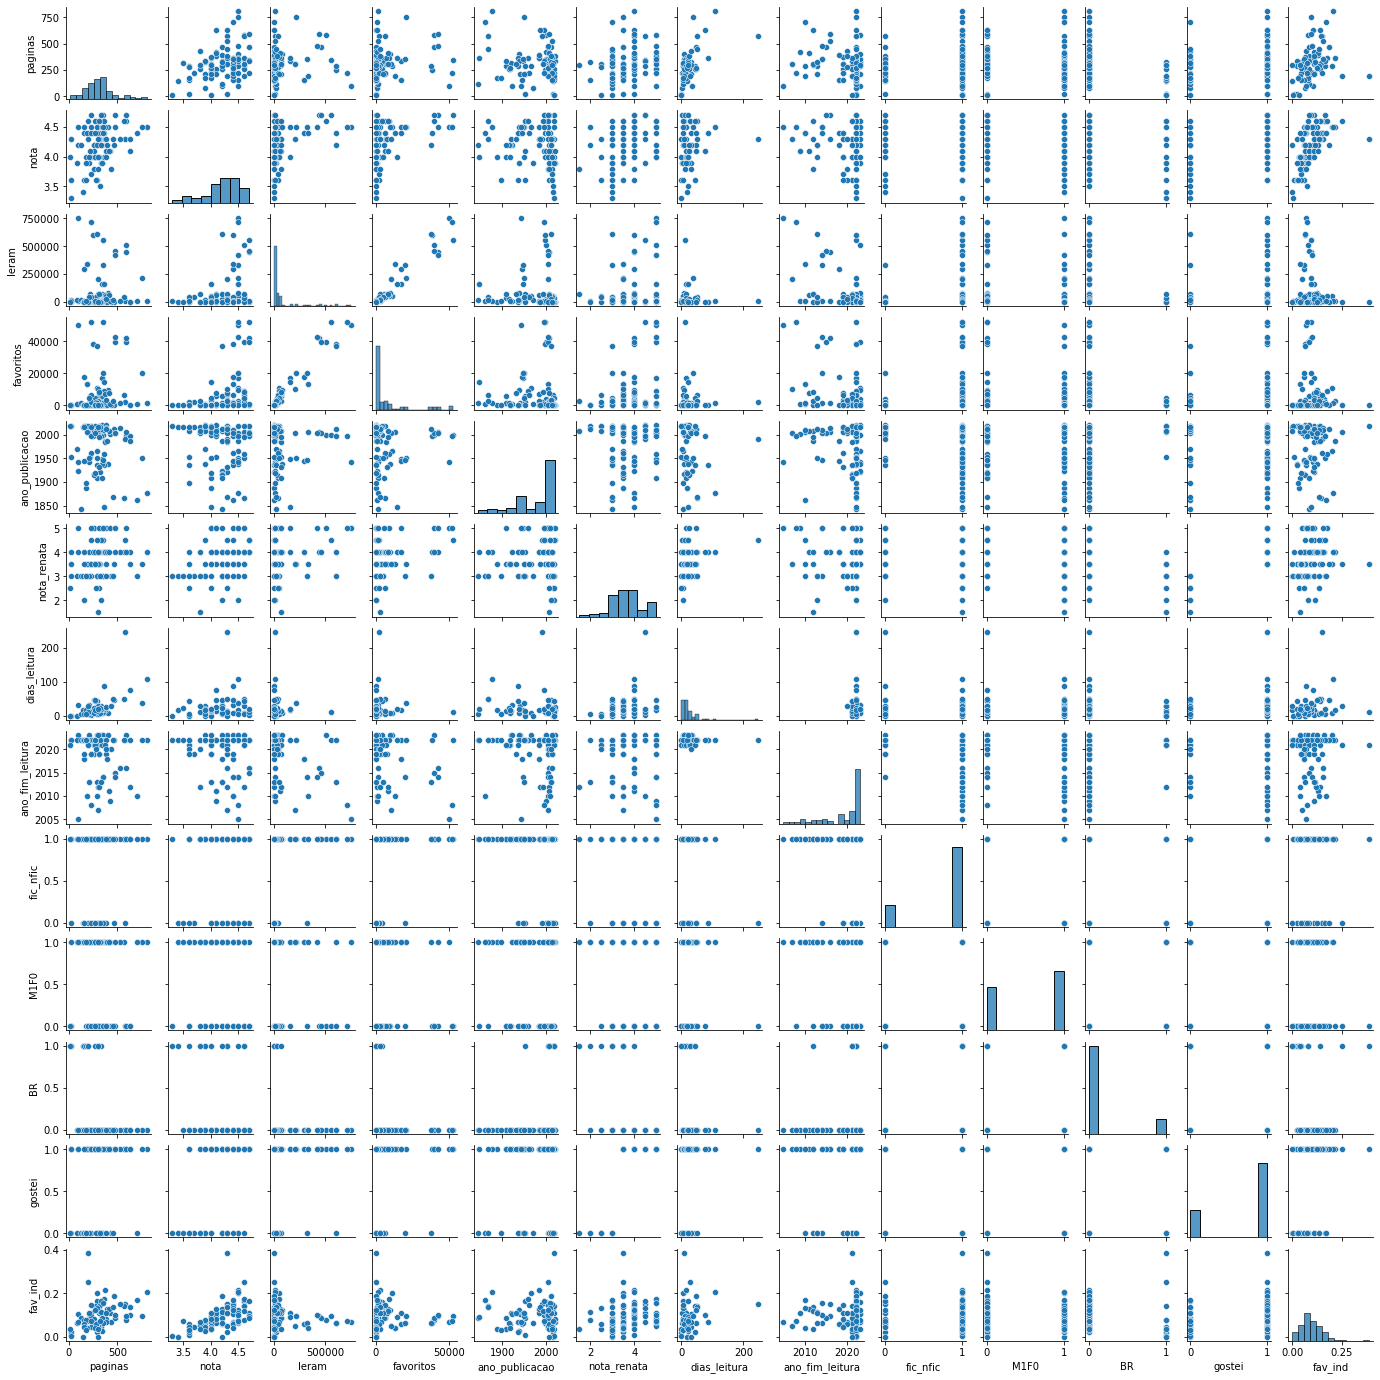

In [58]:
sns.pairplot(df, height = 1.5)

<AxesSubplot:ylabel='nota_renata'>

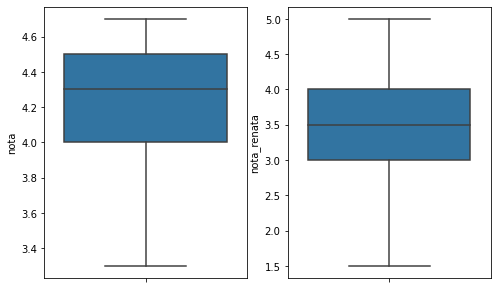

In [151]:
fig, ax = plt.subplots(1,2, figsize = (8,5))

sns.boxplot(data = df, y='nota',ax=ax[0])
sns.boxplot(data = df, y='nota_renata',ax=ax[1])

<AxesSubplot:xlabel='fic_nfic', ylabel='nota_renata'>

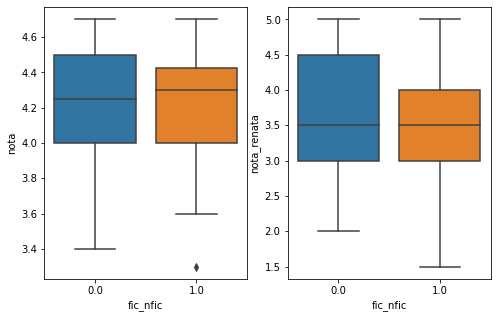

In [157]:
fig, ax = plt.subplots(1,2, figsize = (8,5))

sns.boxplot(data = df, x = 'fic_nfic',y='nota',ax=ax[0])
sns.boxplot(data = df, x = 'fic_nfic',y='nota_renata',ax=ax[1])

<AxesSubplot:ylabel='Frequency'>

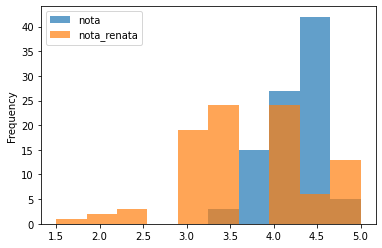

In [170]:
df[['nota', 'nota_renata']].plot(kind='hist', alpha=0.7)

<AxesSubplot:>

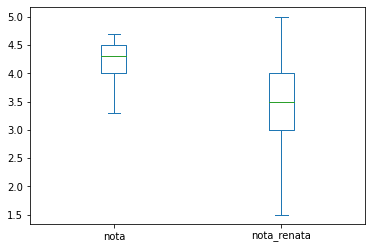

In [247]:
df[['nota', 'nota_renata']].plot(kind='box')

<AxesSubplot:ylabel='Density'>

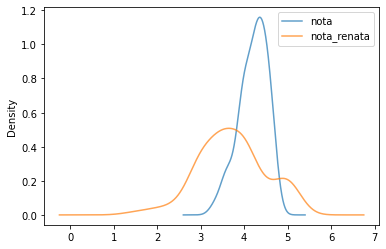

In [250]:
df[['nota', 'nota_renata']].plot(kind='kde', alpha=0.7)

In [91]:
df.corr()

,paginas,nota,leram,favoritos,ano_publicacao,nota_renata,dias_leitura,ano_fim_leitura,fic_nfic,M1F0,BR,gostei,fav_ind
paginas,1.000000,0.368206,0.070993,0.155653,-0.139513,0.209174,0.581184,-0.102289,0.115461,-0.142109,-0.398075,0.183951,0.354897
nota,0.368206,1.000000,0.375553,0.441182,-0.085392,0.376495,0.147169,-0.153807,0.036917,-0.081996,-0.222250,0.438321,0.548233
leram,0.070993,0.375553,1.000000,0.969745,0.053023,0.269108,-0.063706,-0.431991,0.200851,-0.111063,-0.187417,0.127760,-0.137169
favoritos,0.155653,0.441182,0.969745,1.000000,0.040758,0.322351,-0.055593,-0.365283,0.224616,-0.131582,-0.205961,0.171363,-0.057405
ano_publicacao,-0.139513,-0.085392,0.053023,0.040758,1.000000,0.033999,-0.086095,-0.132431,-0.280422,0.049870,0.291994,0.020965,-0.020261
nota_renata,0.209174,0.376495,0.269108,0.322351,0.033999,1.000000,0.285359,-0.064085,-0.039946,-0.101911,-0.362340,0.737260,0.164427
dias_leitura,0.581184,0.147169,-0.063706,-0.055593,-0.086095,0.285359,1.000000,-0.036506,-0.239412,-0.091541,-0.166357,0.185394,0.182738
ano_fim_leitura,-0.102289,-0.153807,-0.431991,-0.365283,-0.132431,-0.064085,-0.036506,1.000000,-0.191039,-0.170399,0.137443,0.010950,0.016905
fic_nfic,0.115461,0.036917,0.200851,0.224616,-0.280422,-0.039946,-0.239412,-0.191039,1.000000,-0.078829,-0.164461,0.033482,0.051385
M1F0,-0.142109,-0.081996,-0.111063,-0.131582,0.049870,-0.101911,-0.091541,-0.170399,-0.078829,1.000000,-0.094030,-0.079002,-0.076401


In [152]:
df.describe()

,paginas,nota,leram,favoritos,ano_publicacao,nota_renata,dias_leitura,ano_fim_leitura,fic_nfic,M1F0,BR,gostei,fav_ind
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,56.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,314.173913,4.207609,89461.032609,7211.054348,1976.565217,3.717391,27.000000,2019.358696,0.782609,0.576087,0.141304,0.728261,0.096282
std,153.635977,0.324540,173645.082446,13089.604043,47.026601,0.764258,37.219741,4.414217,0.414731,0.496885,0.350244,0.447294,0.059528
min,14.000000,3.300000,1.000000,0.000000,1843.000000,1.500000,0.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,4.000000,3540.500000,283.750000,1946.500000,3.000000,7.750000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.059994
50%,300.500000,4.300000,13643.000000,1433.000000,1999.500000,3.500000,17.000000,2022.000000,1.000000,1.000000,0.000000,1.000000,0.087197
75%,368.000000,4.500000,62430.000000,6710.000000,2012.000000,4.000000,30.250000,2022.000000,1.000000,1.000000,0.000000,1.000000,0.128907
max,808.000000,4.700000,752777.000000,52482.000000,2021.000000,5.000000,248.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,0.387097


In [ ]:
#from sklearn.model_selection import train_test_split
#import pandas as pd

# carregue sua base de dados usando pandas
#df

# divida a base de dados em conjuntos de treino e teste
##train, test = train_test_split(df, test_size=0.2)

# o argumento test_size determina a proporção da base de dados que deve ser usada para teste
# neste exemplo, estamos usando 20% dos dados para teste
# o argumento random_state é usado para garantir que a divisão da base de dados seja sempre a mesma (, random_state=42)
# isso é importante para que os resultados possam ser reproduzidos

# agora você pode usar os conjuntos de treino e teste em seus modelos de machine learning


# Treino e Teste

In [60]:
train, test = train_test_split(df, test_size=0.2)

## Regressão Linear (1 variável = nota)

In [61]:
model = LinearRegression()

In [62]:
X = train[['nota']]
y = train.nota_renata

In [63]:
model.fit(X,y)

LinearRegression()

In [64]:
nota_predict = model.predict(X)

In [65]:
train['nota_predict'] = nota_predict

In [66]:
train.loc[train['nota_predict']>=3.5, 'gostei_predict'] = 1
train.loc[train['nota_predict']<3.5, 'gostei_predict'] = 0

In [67]:
train['error'] = train['nota_renata'] - train['nota_predict']

In [68]:
train

,titulo,autor,paginas,genero,nota,leram,favoritos,ano_publicacao,genero_autor,pais_origem,sigla_pais,nota_renata,inicio_leitura,fim_leitura,dias_leitura,ano_fim_leitura,fic_nfic,M1F0,BR,gostei,fav_ind,nota_predict,gostei_predict,error
6,Cartas de um Diabo a seu Aprendiz,C. S. Lewis,208,Ficção / Filosofia / Literatura Estrangeira / Religião e Espiritualidade / Romance,4.4,13973,1452,1942,M,Irlanda,IRL,4.0,17/12/22,17/01/23,31.0,2023,1.0,1.0,0.0,1.0,0.103915,3.841281,1.0,0.158719
60,Forrest Gump,Winston Groom,392,Drama / Literatura Estrangeira / Romance,4.2,3260,420,1986,M,Estados Unidos,USA,4.0,NaN,05/06/18,NaN,2018,1.0,1.0,0.0,1.0,0.128834,3.669101,1.0,0.330899
66,O Menino do Pijama Listrado,Oliver Jeffers,190,Literatura Estrangeira / Romance / Drama / Ficção,4.4,337744,13418,2006,M,Irlanda,IRL,3.5,NaN,NaN,NaN,2010,1.0,1.0,0.0,1.0,0.039728,3.841281,1.0,-0.341281
77,Laranja Mecânica,Anthony Burgess,224,Distopia / Ficção / Literatura Estrangeira,4.4,43477,6439,1962,M,Reino Unido,GBR,3.5,NaN,NaN,NaN,2019,1.0,1.0,0.0,1.0,0.148101,3.841281,1.0,-0.341281
61,Harry Potter e as Relíquias da Morte,J.K. Rowling,592,Aventura / Fantasia / Ficção / Infantojuvenil / Jovem adulto / Literatura Estrangeira / Romance,4.7,445047,42331,2007,F,Reino Unido,GBR,4.0,NaN,NaN,NaN,2016,1.0,0.0,0.0,1.0,0.095116,4.099550,1.0,-0.099550
76,Quarto,Emma Donoghue,350,Drama / Literatura Estrangeira / Romance,4.4,9773,1506,2010,F,Irlanda,IRL,5.0,NaN,NaN,NaN,2014,1.0,0.0,0.0,1.0,0.154098,3.841281,1.0,1.158719
62,Toda Luz que Não Podemos Ver,Anthony Doerr,526,Ficção / Literatura Estrangeira / Romance,4.3,11476,1743,2014,M,Estados Unidos,USA,4.0,NaN,01/03/16,NaN,2016,1.0,1.0,0.0,1.0,0.151882,3.755191,1.0,0.244809
2,Rilla de Ingleside,L. M. Montgomery,320,Aventura / Infantojuvenil / Literatura Estrangeira / Romance,4.3,4482,486,1921,F,Canadá,CAN,3.5,01/02/23,16/02/23,15.0,2023,1.0,0.0,0.0,1.0,0.108434,3.755191,1.0,-0.255191
32,Diga aos Lobos Que Estou em Casa,Carol Rifka Brunt,464,Literatura Estrangeira,4.2,1914,355,2012,F,Estados Unidos,USA,3.5,26/03/22,13/05/22,48.0,2022,0.0,0.0,0.0,1.0,0.185475,3.669101,1.0,-0.169101
88,Mulherzinhas,Louisa May Alcott,450,Literatura Estrangeira / Ficção / Romance,4.3,20747,2824,1868,F,Estados Unidos,USA,3.0,02/01/22,22/02/22,51.0,2022,1.0,0.0,0.0,0.0,0.136116,3.755191,1.0,-0.755191


<AxesSubplot:xlabel='nota', ylabel='nota_renata'>

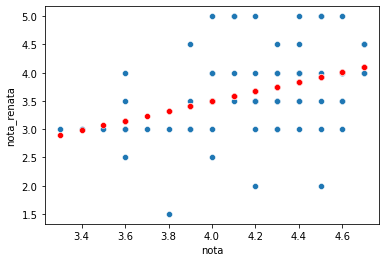

In [69]:
sns.scatterplot(x = train.nota, y = train.nota_renata)
sns.scatterplot(x = train.nota, y = train.nota_predict, color='red')

<AxesSubplot:xlabel='nota_renata', ylabel='gostei'>

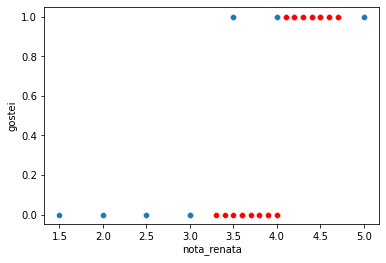

In [70]:
sns.scatterplot(x = train.nota_renata, y = train.gostei)
sns.scatterplot(x = train.nota, y = train.gostei_predict, color='red')

## Regressão Linear (mais variáveis)

In [158]:
X1 = train[['nota','fic_nfic','M1F0','BR']]
y1 = train.nota_renata

test_X1 = test[['nota','fic_nfic','M1F0','BR']]
test_y1 = test.nota_renata

In [72]:
model1 = LinearRegression()

In [73]:
model1.fit(X1,y1)

LinearRegression()

In [74]:
nota_predict1 = model1.predict(X1)

In [75]:
train['nota_predict1'] = nota_predict1

In [91]:
#train['error1'] = train['nota_renata'] - train['nota_predict1']

In [76]:
train.loc[train['nota_predict']>=3.5, 'gostei_predict1'] = 1
train.loc[train['nota_predict']<3.5, 'gostei_predict1'] = 0

<AxesSubplot:xlabel='nota', ylabel='nota_renata'>

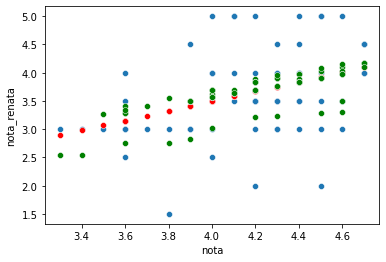

In [77]:
sns.scatterplot(x = train.nota, y = train.nota_renata)
sns.scatterplot(x = train.nota, y = train.nota_predict, color='red')
sns.scatterplot(x = train.nota, y = train.nota_predict1, color='green')

In [160]:
nota_predict_test1 = model1.predict(test_X1)

test['nota_predict1'] = nota_predict_test1

test.loc[test['nota_predict1']>=3.5, 'gostei_predict1'] = 1
test.loc[test['nota_predict1']<3.5, 'gostei_predict1'] = 0

In [163]:
test

,titulo,autor,paginas,genero,nota,leram,favoritos,ano_publicacao,genero_autor,pais_origem,sigla_pais,nota_renata,inicio_leitura,fim_leitura,dias_leitura,ano_fim_leitura,fic_nfic,M1F0,BR,gostei,fav_ind,nota_predict1,gostei_predict1
22,Anna Kariênina,Leon Tolstói,808,Ficção / Literatura Estrangeira / Romance / Drama,4.5,6837,1414,1877,M,Rússia,RUS,4.0,28/05/22,15/09/22,110.0,2022,1.0,1.0,0.0,1.0,0.206816,3.907675,1.0
40,Antropoceno,John Green,384,Ensaios / Literatura Estrangeira / Não-ficção,4.1,1201,98,2021,M,Estados Unidos,USA,5.0,19/02/22,16/03/22,25.0,2022,0.0,1.0,0.0,1.0,0.081599,3.687123,1.0
11,Um Conto de Natal,Charles Dickens,121,Fantasia / Ficção / Literatura Estrangeira,4.2,15058,1271,1843,M,Reino Unido,GBR,3.0,11/12/22,15/12/22,4.0,2022,1.0,1.0,0.0,0.0,0.084407,3.701455,1.0
38,A Vila,Ana Carolina Kherlakian,176,Esoterismo / Filosofia / Literatura Estrangeira / Psicologia / Religião e Espiritualidade / Roma...,3.9,192,15,2019,F,Brasil,BRA,3.0,08/03/22,24/03/22,16.0,2022,1.0,0.0,1.0,0.0,0.078125,2.958196,0.0
12,1984,George Orwell,336,Distopia / Ficção científica,4.5,158972,17182,1949,M,Reino Unido,GBR,5.0,23/11/22,09/12/22,16.0,2022,1.0,1.0,0.0,1.0,0.108082,3.907675,1.0
59,Mindset,Carol S. Dweck,310,Psicologia,4.0,9748,471,2006,F,Estados Unidos,USA,5.0,NaN,04/02/19,NaN,2019,0.0,0.0,0.0,1.0,0.048318,3.748666,1.0
15,O Sol é Para Todos,Harper Lee,364,Ficção / Literatura Estrangeira,4.6,51216,9014,1960,F,Estados Unidos,USA,5.0,NaN,21/11/22,NaN,2022,1.0,0.0,0.0,1.0,0.176000,4.106697,1.0
82,Harry Potter e a Pedra Filosofal,J.K. Rowling,224,Aventura / Fantasia / Literatura Estrangeira / Ficção / Infantojuvenil,4.5,714357,52054,1997,F,Reino Unido,GBR,5.0,NaN,NaN,NaN,2008,1.0,0.0,0.0,1.0,0.072868,4.037957,1.0
17,O Castelo Animado,Diana Wynne Jones,368,Fantasia / Ficção / Infantojuvenil / Literatura Estrangeira,4.5,12982,2819,1986,F,Reino Unido,GBR,4.0,12/10/22,28/10/22,16.0,2022,1.0,0.0,0.0,1.0,0.217147,4.037957,1.0
0,Flores para Algernon,Daniel Keyes,288,Literatura Estrangeira / Romance / Ficção científica,4.5,53899,10865,1966,M,Estados Unidos,USA,3.5,17/02/23,24/02/23,7.0,2023,1.0,1.0,0.0,1.0,0.201581,3.907675,1.0


In [107]:
df.corr()

,paginas,nota,leram,favoritos,ano_publicacao,nota_renata,dias_leitura,ano_fim_leitura,fic_nfic,M1F0,BR,gostei,fav_ind
paginas,1.000000,0.368206,0.070993,0.155653,-0.139513,0.209174,0.581184,-0.102289,0.115461,-0.142109,-0.398075,0.183951,0.354897
nota,0.368206,1.000000,0.375553,0.441182,-0.085392,0.376495,0.147169,-0.153807,0.036917,-0.081996,-0.222250,0.438321,0.548233
leram,0.070993,0.375553,1.000000,0.969745,0.053023,0.269108,-0.063706,-0.431991,0.200851,-0.111063,-0.187417,0.127760,-0.137169
favoritos,0.155653,0.441182,0.969745,1.000000,0.040758,0.322351,-0.055593,-0.365283,0.224616,-0.131582,-0.205961,0.171363,-0.057405
ano_publicacao,-0.139513,-0.085392,0.053023,0.040758,1.000000,0.033999,-0.086095,-0.132431,-0.280422,0.049870,0.291994,0.020965,-0.020261
nota_renata,0.209174,0.376495,0.269108,0.322351,0.033999,1.000000,0.285359,-0.064085,-0.039946,-0.101911,-0.362340,0.737260,0.164427
dias_leitura,0.581184,0.147169,-0.063706,-0.055593,-0.086095,0.285359,1.000000,-0.036506,-0.239412,-0.091541,-0.166357,0.185394,0.182738
ano_fim_leitura,-0.102289,-0.153807,-0.431991,-0.365283,-0.132431,-0.064085,-0.036506,1.000000,-0.191039,-0.170399,0.137443,0.010950,0.016905
fic_nfic,0.115461,0.036917,0.200851,0.224616,-0.280422,-0.039946,-0.239412,-0.191039,1.000000,-0.078829,-0.164461,0.033482,0.051385
M1F0,-0.142109,-0.081996,-0.111063,-0.131582,0.049870,-0.101911,-0.091541,-0.170399,-0.078829,1.000000,-0.094030,-0.079002,-0.076401


In [81]:
model1.score(X1, y1)

0.24824149417554697

In [90]:
model2.score(X2, y2)

0.15897430174252347

## outras variáveis

In [175]:
X2 = train[['nota','fic_nfic','BR','favoritos']]
y2 = train.nota_renata

model2 = LinearRegression()

model2.fit(X2,y2)

nota_predict2 = model2.predict(X2)

train['nota_predict2'] = nota_predict2

#train['error2'] = train['nota_renata'] - train['nota_predict2']

In [125]:
train.loc[train['nota_predict']>=3.5, 'gostei_predict2'] = 1
train.loc[train['nota_predict']<3.5, 'gostei_predict2'] = 0

<AxesSubplot:xlabel='nota', ylabel='nota_renata'>

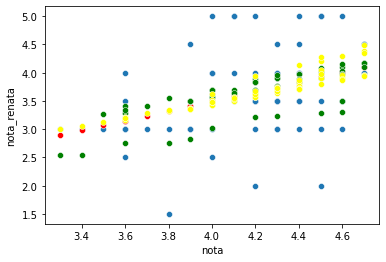

In [127]:
sns.scatterplot(x = train.nota, y = train.nota_renata)
sns.scatterplot(x = train.nota, y = train.nota_predict, color='red')
sns.scatterplot(x = train.nota, y = train.nota_predict1, color='green')
sns.scatterplot(x = train.nota, y = train.nota_predict2, color='yellow')

In [92]:
model.score(X, y)

0.15351019606190475

In [93]:
model1.score(X1, y1)

0.24824149417554697

In [176]:
model2.score(X2, y2)

0.25846965890718765

In [178]:
model3.score(X3, y3)

0.7123287671232876

In [169]:
model3.score(test_X3, test_y3)

0.7894736842105263

# Regressão Logística

In [179]:
X3 = train[['nota']]
y3 = train.gostei

test_X3 = test[['nota']]
test_y3 = test.gostei

In [182]:
X3 = train[['nota']]
y3 = train.gostei

model3 = LogisticRegression()

model3.fit(X3,y3)

gostei_logistic = model3.predict(X3)

train['gostei_logistic'] = gostei_logistic

#train['error2'] = train['nota_renata'] - train['nota_predict2']

In [167]:
nota_predict_test3 = model3.predict(test_X3)

test['gostei_logistic3'] = nota_predict_test3

## Regressão Logistica 2

In [281]:
X4 = train[['nota','fic_nfic']]
y4 = train.gostei

model4 = LogisticRegression()

model4.fit(X4,y4)

gostei_logistic1 = model4.predict(X4)

train['gostei_logistic1'] = gostei_logistic1

In [ ]:
model3.score(X3, y3)

In [ ]:
model3.score(test_X3, test_y3)

# Aplicar model1, model3(logistic), model4 no df

## Model2

In [195]:
df_X2 = df[['nota','fic_nfic','BR','favoritos']]

nota_model2 = model2.predict(df_X2)

df['nota_model2'] = [round(i,ndigits=1) for i in nota_model2]

## Model3

In [193]:
df_X3 = df[['nota']]

gostei_logistic = model3.predict(df_X3)

df['gostei_logistic'] = gostei_logistic

## Model4

In [282]:
df_X4 = df[['nota','fic_nfic']]

gostei_logistic1 = model4.predict(df_X4)

df['gostei_logistic1'] = gostei_logistic1

In [198]:
model2.score(df_X2, df['nota_renata'])

0.25049525343313994

In [187]:
model3.score(df_X3, df['gostei'])

0.7717391304347826

# Regressão Linear (Model 2)

<AxesSubplot:ylabel='Frequency'>

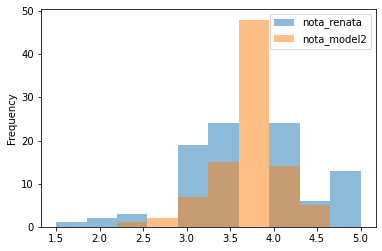

In [204]:
df[['nota_renata','nota_model2']].plot(kind='hist', alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

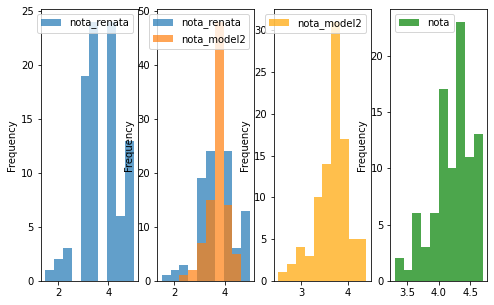

In [257]:
fig, ax = plt.subplots(1,4, figsize = (8,5))

df[['nota_renata']].plot(kind='hist', alpha=0.7, ax=ax[0])
df[['nota_model2']].plot(kind='hist', alpha=0.7, ax=ax[2], color='orange')
df[['nota_renata','nota_model2']].plot(kind='hist', alpha=0.7, ax=ax[1])
df[['nota']].plot(kind='hist', alpha=0.7, ax=ax[3], color='green')

# Regressão Logística (Model3)

In [213]:
conf_matrix = df.groupby(['gostei', 'gostei_logistic'])['titulo'].count().reset_index()
conf_matrix

,gostei,gostei_logistic,titulo
0,0.0,0.0,6
1,0.0,1.0,19
2,1.0,0.0,2
3,1.0,1.0,65


In [214]:
conf_matrix1 = conf_matrix.pivot_table(index='gostei', columns='gostei_logistic').copy()
conf_matrix1

titulo    
gostei_logistic    0.0 1.0
gostei                    
0.0                  6  19
1.0                  2  65

In [215]:
tn = conf_matrix1.iloc[0,0]
fp = conf_matrix1.iloc[0,1]
fn = conf_matrix1.iloc[1,0]
tp = conf_matrix1.iloc[1,1]

In [216]:
total = tn + fp + fn + tp
total

92

In [226]:
#accuracy
#(65+6)/92
acc = (tp+tn)/total
print (f'accuracy = {acc}')

#precision
#65/(65+19)
prec = tp/(tp+fp)
print(f'precision = {prec}')

#recall
#65/(65+2)
rec = tp/(tp+fn)
print(f'recall = {rec}')

#f1
# 2*(prec*rec)/(prec+rec)
f1 = 2*(prec*rec)/(prec+rec)
print(f'f1 = {f1}')

accuracy = 0.7717391304347826
precision = 0.7738095238095238
recall = 0.9701492537313433
f1 = 0.8609271523178809


# Regressão Logística 2 (Model4)

In [283]:
conf_matrix = df.groupby(['gostei', 'gostei_logistic1'])['titulo'].count().reset_index()
conf_matrix
conf_matrix2 = conf_matrix.pivot_table(index='gostei', columns='gostei_logistic1').copy()
conf_matrix2

titulo    
gostei_logistic1    0.0 1.0
gostei                     
0.0                   7  18
1.0                   2  65

In [284]:
tn2 = conf_matrix2.iloc[0,0]
fp2 = conf_matrix2.iloc[0,1]
fn2 = conf_matrix2.iloc[1,0]
tp2 = conf_matrix2.iloc[1,1]
total2 = tn2 + fp2 + fn2 + tp2
total2

92

In [285]:
#accuracy
#(65+6)/92
acc2 = (tp2+tn2)/total2
print (f'accuracy = {acc2}')

#precision
#65/(65+19)
prec2 = tp2/(tp2+fp2)
print(f'precision = {prec2}')

#recall
#65/(65+2)
rec2 = tp2/(tp2+fn2)
print(f'recall = {rec2}')

#f1
# 2*(prec*rec)/(prec+rec)
f12 = 2*(prec2*rec2)/(prec2+rec2)
print(f'f1 = {f12}')

accuracy = 0.782608695652174
precision = 0.7831325301204819
recall = 0.9701492537313433
f1 = 0.8666666666666668


<AxesSubplot:>

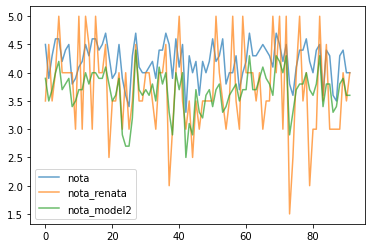

In [254]:
df[['nota', 'nota_renata','nota_model2']].plot(kind='line', alpha = 0.7)

<AxesSubplot:>

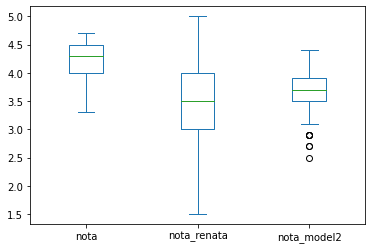

In [255]:
df[['nota', 'nota_renata','nota_model2']].plot(kind='box')